In [1]:
!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane.jpg -O plane.jpg

--2024-07-24 17:38:22--  https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane.jpg
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane.jpg [following]
--2024-07-24 17:38:22--  https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4937732 (4.7M) [image/jpeg]
Saving to: 'plane.jpg'

plane.jpg           100%[===================>]   4.71M  10.0MB/s    in 0.5s    

2024-07-24 17:38:23 (10.0 MB/s)

In [2]:
!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane_256x256.jpg -O plane_256x256.jpg

--2024-07-24 17:38:24--  https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/images/plane_256x256.jpg
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane_256x256.jpg [following]
--2024-07-24 17:38:24--  https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/images/plane_256x256.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22974 (22K) [image/jpeg]
Saving to: 'plane_256x256.jpg'

plane_256x256.jpg   100%[===================>]  22.44K  --.-KB/s    in 0.005s  

20

In [3]:
# 이미지 파일 열기
import cv2
img = cv2.imread('plane_256x256.jpg', 0) # 아무 지정없이 열면 BGR로 열림
img.shape

(256, 256)

In [4]:
img_gray = cv2.imread('plane_256x256.jpg', cv2.IMREAD_GRAYSCALE) # 그레이스케일로 열기

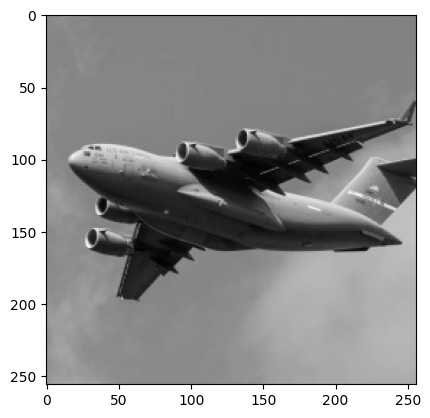

In [5]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(img_gray, cmap='gray')
plt.show()

# 적응적 이진화

In [6]:
# 기본값 설정
max_output_value = 255 # 픽셀 강도 0~255
neighborhood_size = 3 # 평균에 사용되는 이웃 크기
subtract_from_mean = 10 # 평균에서 빼는 값. 크면 임계값이 낮아져서 이미지가 더 하얗게 됨

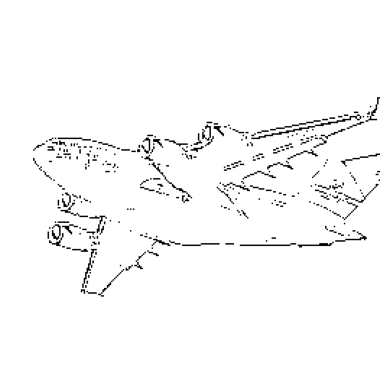

In [7]:
# 가우스 평균 사용
img_binarized = cv2.adaptiveThreshold(img_gray,
                                      max_output_value,
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY,
                                      neighborhood_size,
                                      subtract_from_mean)
plt.imshow(img_binarized, cmap='gray')
plt.axis('off')
plt.show()

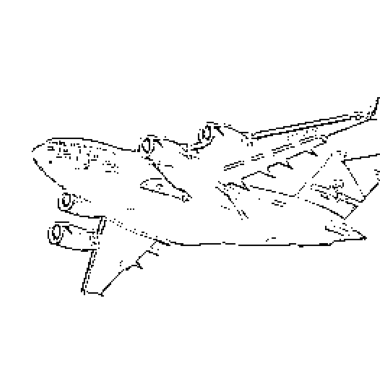

In [8]:
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용
image_mean_threshold = cv2.adaptiveThreshold(img_gray,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# 이미지 출력
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

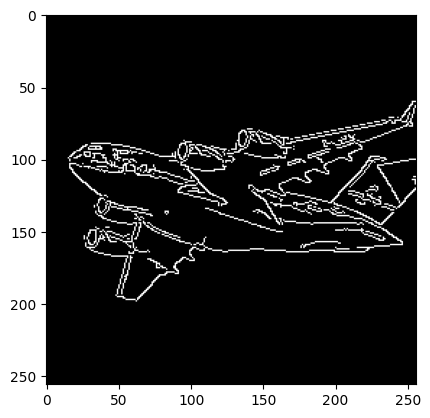

In [9]:
# 캐니 경계선 감지기 적용
img_canny = cv2.Canny(img_gray, 50, 150)
plt.imshow(img_canny, cmap="gray")
plt.show()

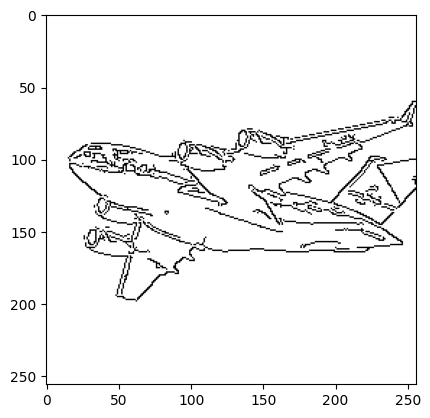

In [10]:
# not 연산 적용

bitwise_not = cv2.bitwise_not(img_canny)
plt.imshow(bitwise_not, cmap="gray")
plt.show()

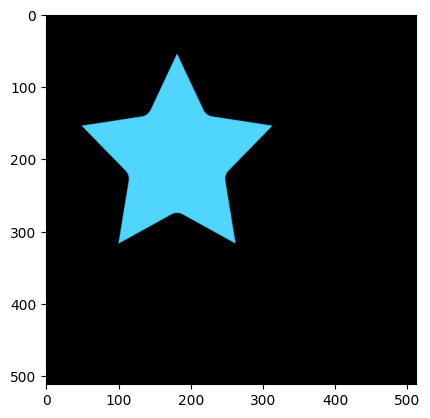

In [11]:
# 별 이미지를 열어서 캐니를 이용하여 겨계선을 감지하시오

# 컬러로 이미지 읽기
star_color = cv2.imread('star_img.png', 1)

# 기본 이미지 출력
plt.imshow(star_color, cmap='gray')
plt.show()

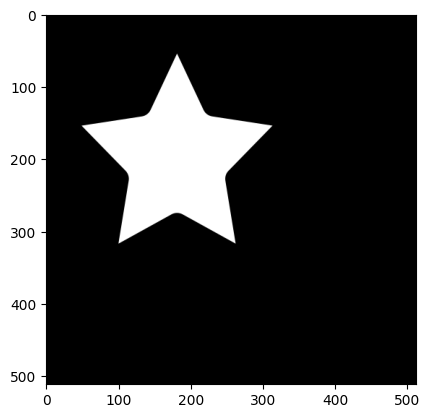

In [12]:
# 흑백으로 변경
star_gray = cv2.cvtColor(star_color, cv2.COLOR_BGR2GRAY)
plt.imshow(star_gray, cmap='gray')
plt.show()

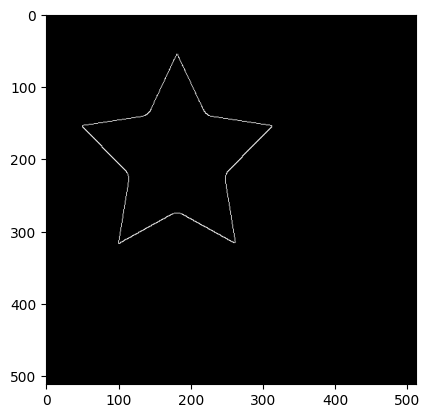

In [13]:
# 캐니 경계선 감지 적용 (이미지의 윤곽선 검출 - Canny 이용)
import numpy as np
star_canny = cv2.Canny(star_gray, 50, 250)

plt.imshow(star_canny, cmap='gray')
plt.show()

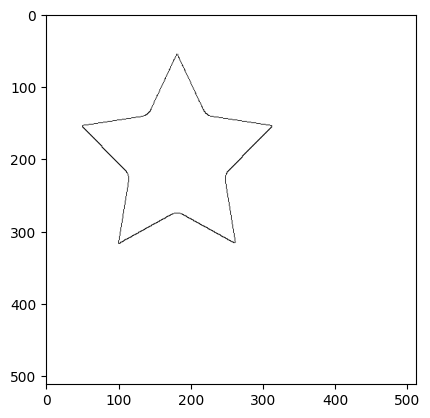

In [14]:
# 반전해서 검출 - bitwise_not 사용
edge_reverse = cv2.bitwise_not(star_canny)

plt.imshow(edge_reverse, cmap='gray')
plt.show()

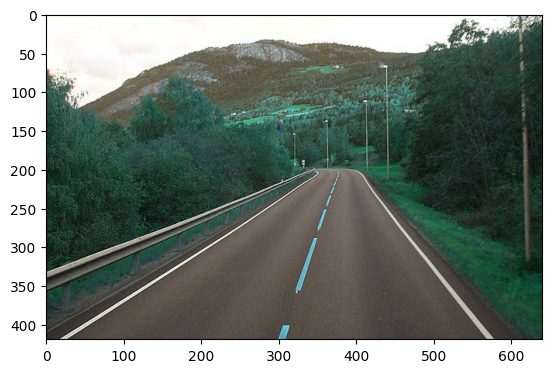

In [15]:
# road 이미지 읽기
road = cv2.imread('road.jpg')
plt.imshow(road)
plt.show()

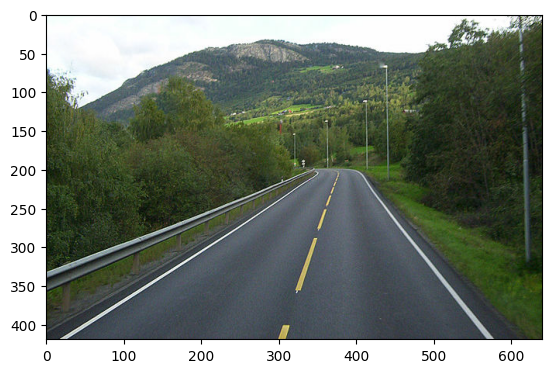

In [16]:
# RGB로 변환
road_rgb = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)
plt.imshow(road_rgb)
plt.show()

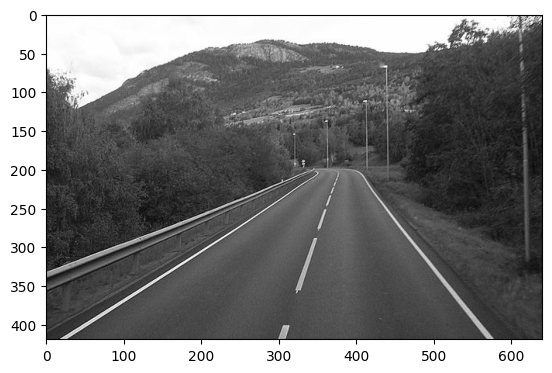

In [17]:
# 흑백으로 변환
road_gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
plt.imshow(road_gray, cmap='gray')
plt.show()

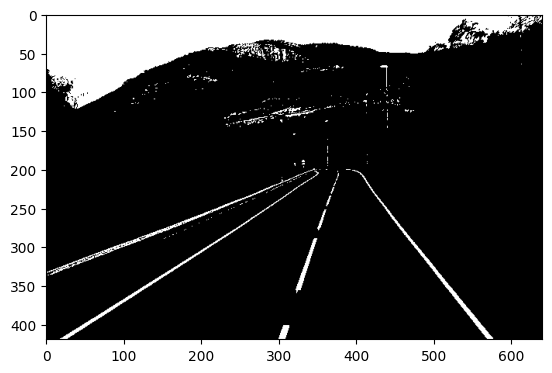

In [18]:
# 이미지 이진화
ret, thresh = cv2.threshold(road_gray, 150, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.show()

In [19]:
# Contours를 이용해서 경계선 좌표 구하기
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours:', len(contours))

Number of contours: 455


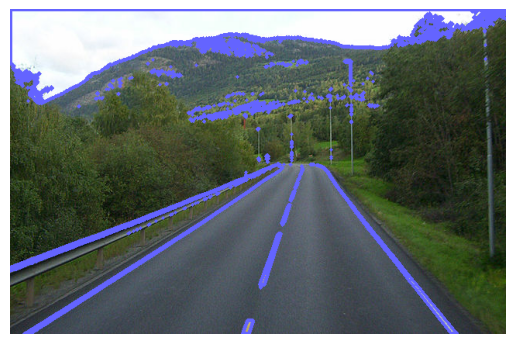

In [20]:
# Contours 이용해서 경계선 그리기
road_contours = cv2.drawContours(road_rgb, contours, -1, (100, 100, 255), 3)

plt.imshow(road_contours)
plt.axis('off')
plt.show()

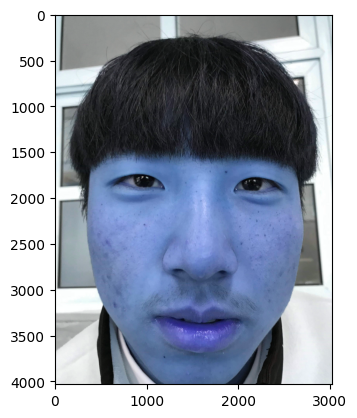

In [21]:
# 이미지 읽기 - bgr
face_bgr = cv2.imread('jsh.jpg')

plt.imshow(face_bgr)
plt.show()

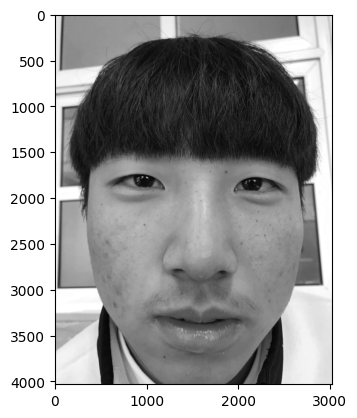

In [22]:
# 이미지 BGR -> GRAY로 변환
face_gray = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(face_gray, cmap='gray')
plt.show()

In [23]:
# 분류기 가져오기

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [24]:
# 얼굴 검출
faces = face_cascade.detectMultiScale(face_gray)
faces

array([[ 339,  960, 2504, 2504],
       [2662, 2196,  192,  192]], dtype=int32)

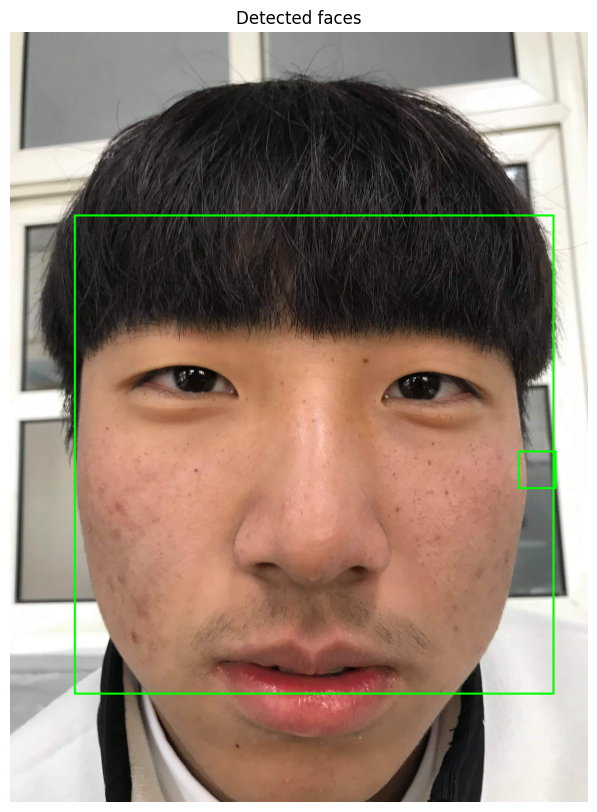

In [25]:
# 얼굴에 박스 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(face_bgr, (x, y), (x+w, y+h), (0, 255, 0), 10)

# BGR -> RGB로 변환
face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(face_rgb)
plt.title('Detected faces')
plt.axis('off')
plt.show()

# 눈 인식

In [26]:
# 얼굴 파일 읽기
face_bgr2 = cv2.imread('face.png')
face_rgb2 = cv2.cvtColor(face_bgr2, cv2.COLOR_BGR2RGB)
face_gray2 = cv2.cvtColor(face_rgb2, cv2.COLOR_RGB2GRAY)

In [27]:
# 얼굴 분류기 가져오기
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# 눈 분류기 가져오기
eys_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# 얼굴탐지
faces = face_cascade.detectMultiScale(face_gray2)

# 좌표로 변경
for (x, y, w, h) in faces:
    roi_gray = face_gray2[y:y+h, x:x+w]
    roi_color = face_rgb2[y:y+h, x:x+w]

    # 눈 탐지
    eyes = eys_cascade.detectMultiScale(roi_gray, 3, 12) #scaler factor, min neighbor 
    print(eyes)
    
    # 눈에 박스 그리기
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

[[ 53  79  60  60]
 [164  90  60  60]]


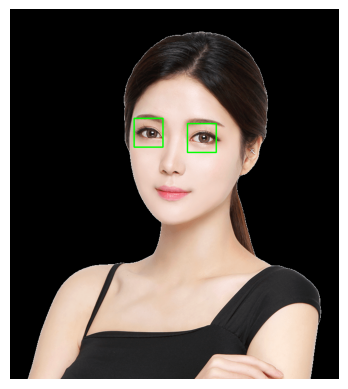

In [28]:
# 시각화
plt.imshow(face_rgb2)
plt.axis('off')
plt.show()

In [29]:
# 영상 다운로드
!wget https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4 -O bunny.mp4

--2024-07-24 17:38:29--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 172.67.14.163, 104.22.64.163, 104.22.65.163
Connecting to download.blender.org (download.blender.org)|172.67.14.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: 'bunny.mp4'

bunny.mp4           100%[===================>]  61.66M  2.98MB/s    in 13s     

2024-07-24 17:38:42 (4.80 MB/s) - 'bunny.mp4' saved [64657027/64657027]



In [30]:
# 동영상 읽기
import cv2

try:
    cap = cv2.VideoCapture('bunny.mp4')
    print('동영상 읽기 성공')
except:
    print('동영상 읽기 실패')

동영상 읽기 성공


In [31]:
# 동영상 정보 확인
video = cv2.VideoCapture('bunny.mp4')

In [32]:
# 오픈이 안되면 메세지
if not video.isOpened():
    print('동영상 파일을 열 수 없습니다.')
    exit()
else:
    print('동영상 파일을 열었습니다.')

동영상 파일을 열었습니다.


In [33]:
# 오픈이 되면 정보 출력
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)
print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 14315
width : 320
height : 180
fps : 24.0


In [34]:
# 영상 출력

while True:
    # 동영상에서 이미지를 프레임 단위로 읽어옴
    ret, frame = cap.read()

    # 파일에 문제가 있거나 동영상이 끝났을 때
    if not ret : # ret이 False
        print('이미지 읽기 실패 또는 모두 읽음')

        # 비디오 종료
        cap.release()

        # 윈도우 실행창 종료
        cv2.destroyAllWindows()
        
        # 반복문 종료
        break

    # 동영상을 잘 읽혔을 때
    cv2.imshow('animation', frame)

    # 한장의 사진을 0.033초 동안 띄움
    k = cv2.waitKey(33)

    # 1을 누르면 동영상 종료
    if k == 49: # ASCII코드 49가 1 임
        print('동영상 종료')
        cap.release()
        cv2.destroyAllWindows()
        break


2024-07-24 17:38:43.045 python[55047:2109080] +[IMKClient subclass]: chose IMKClient_Legacy
2024-07-24 17:38:43.045 python[55047:2109080] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


동영상 종료
